In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from zipfile import ZipFile
file_name='/content/drive/MyDrive/main_steel_defect.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()

In [ ]:
import numpy as np
import pandas as pd
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from torchvision import transforms
from torchvision import datasets

In [ ]:
train_dir = "/content/NEU Metal Surface Defects Data/train"
val_dir = "/content/NEU Metal Surface Defects Data/valid"
test_dir = "/content/NEU Metal Surface Defects Data/test"


print("Train Directory:",os.listdir(train_dir))
print("valid Direcory: ", os.listdir(val_dir))
print("Test Directory: ", os.listdir(test_dir))

CLASS_NAMES = os.listdir(train_dir)

Train Directory: ['Scratches', 'Inclusion', 'Rolled', 'Pitted', 'Crazing', 'Patches']
valid Direcory:  ['Scratches', 'Inclusion', 'Rolled', 'Pitted', 'Crazing', 'Patches']
Test Directory:  ['Scratches', 'Inclusion', 'Rolled', 'Pitted', 'Crazing', 'Patches']


In [ ]:
print("Training Inclusion data:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Inclusion data:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Inclusion data:",len(os.listdir(val_dir+'/'+'Inclusion')))

print("Training Rolled data:",len(os.listdir(train_dir+'/'+'Rolled')))
print("Testing Rolled data:",len(os.listdir(test_dir+'/'+'Rolled')))
print("Validation Rolled data:",len(os.listdir(val_dir+'/'+'Rolled')))

print("Training Pitted data:",len(os.listdir(train_dir+'/'+'Pitted')))
print("Testing Pitted data:",len(os.listdir(test_dir+'/'+'Pitted')))
print("Validation Pitted data:",len(os.listdir(val_dir+'/'+'Pitted')))

print("Training Patches data:",len(os.listdir(train_dir+'/'+'Patches')))
print("Testing Patches data:",len(os.listdir(test_dir+'/'+'Patches')))
print("Validation Patches data:",len(os.listdir(val_dir+'/'+'Patches')))

print("Training Scratches data:",len(os.listdir(train_dir+'/'+'Scratches')))
print("Testing Scratches data:",len(os.listdir(test_dir+'/'+'Scratches')))
print("Validation Scratches data:",len(os.listdir(val_dir+'/'+'Scratches')))

print("Training Crazing data:",len(os.listdir(train_dir+'/'+'Crazing')))
print("Testing Crazing data:",len(os.listdir(test_dir+'/'+'Crazing')))
print("Validation Crazing data:",len(os.listdir(val_dir+'/'+'Crazing')))

Training Inclusion data: 276
Testing Inclusion data: 12
Validation Inclusion data: 12
Training Rolled data: 276
Testing Rolled data: 12
Validation Rolled data: 12
Training Pitted data: 276
Testing Pitted data: 12
Validation Pitted data: 12
Training Patches data: 276
Testing Patches data: 12
Validation Patches data: 12
Training Scratches data: 276
Testing Scratches data: 12
Validation Scratches data: 12
Training Crazing data: 276
Testing Crazing data: 12
Validation Crazing data: 12


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=64,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=64,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:
class accuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99 ):
            self.model.stop_training = True

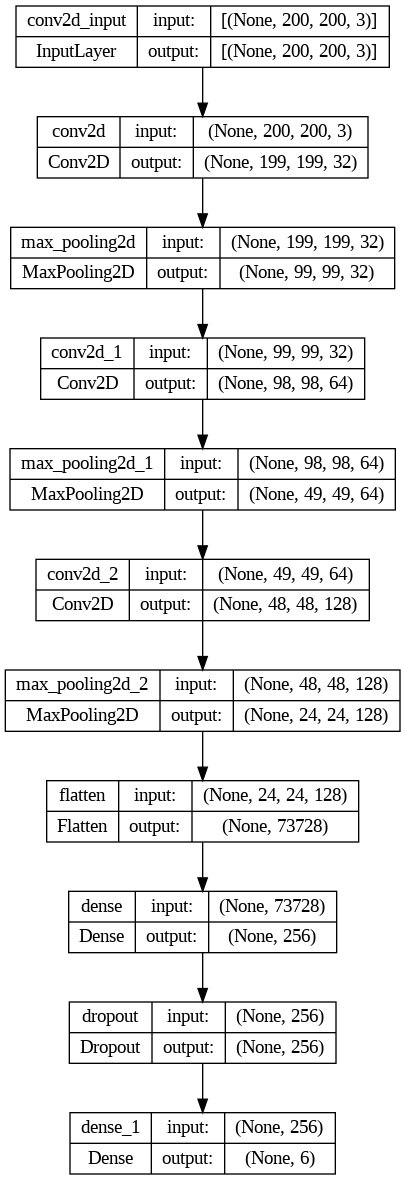

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,"image.png",show_shapes =True)

In [ ]:
callbacks = accuracyCallback()
history = model.fit(train_generator,
        batch_size = 64,
        epochs=100,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/100
26/26 [==============================] - 23s 611ms/step - loss: 2.1197 - accuracy: 0.2077 - val_loss: 1.6786 - val_accuracy: 0.3056
Epoch 2/100
26/26 [==============================] - 17s 655ms/step - loss: 1.6898 - accuracy: 0.2796 - val_loss: 1.9109 - val_accuracy: 0.1667
Epoch 3/100
26/26 [==============================] - 16s 635ms/step - loss: 1.5235 - accuracy: 0.4155 - val_loss: 1.4201 - val_accuracy: 0.2222
Epoch 4/100
26/26 [==============================] - 17s 661ms/step - loss: 1.4770 - accuracy: 0.4293 - val_loss: 1.2377 - val_accuracy: 0.6806
Epoch 5/100
26/26 [==============================] - 16s 615ms/step - loss: 1.2969 - accuracy: 0.5127 - val_loss: 1.1203 - val_accuracy: 0.5556
Epoch 6/100
26/26 [==============================] - 17s 650ms/step - loss: 1.1871 - accuracy: 0.5791 - val_loss: 0.8900 - val_accuracy: 0.5833
Epoch 7/100
26/26 [==============================] - 16s 615ms/step - loss: 1.0626 - accuracy: 0.5900 - val_loss: 0.9788 - val_accuracy:

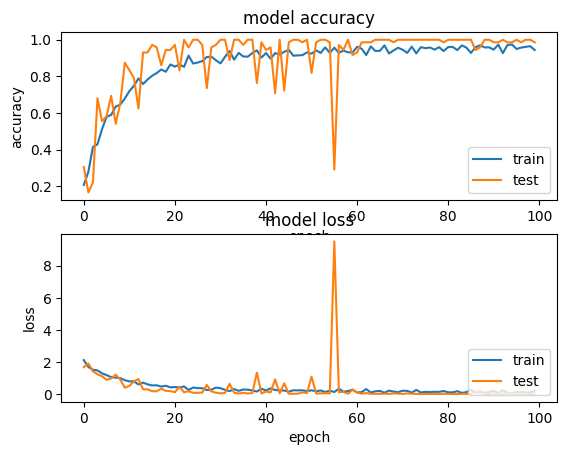

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')



plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
from sklearn.datasets import load_files

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_test, y_test,target_labels = load_dataset(test_dir)

In [ ]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test,no_of_classes)

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

In [ ]:
x_test = np.array(convert_image_to_array(x_test))

In [ ]:
x_test = x_test.astype('float32')/255

3/3 [==============================] - 0s 9ms/step


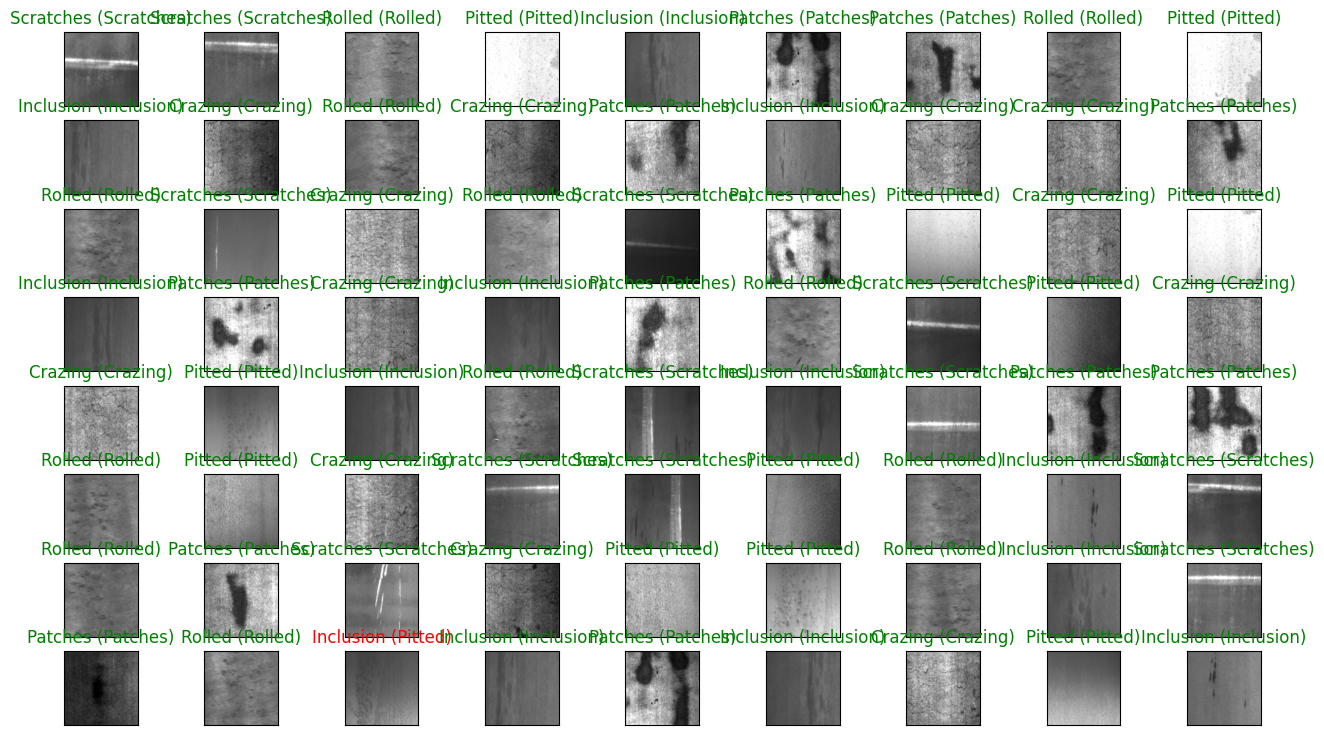

In [ ]:


y_pred = model.predict(x_test)

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=72, replace=False)):
    ax = fig.add_subplot(8, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))


In [ ]:
result = model.evaluate(x_test,y_test)
loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

3/3 [==============================] - 0s 18ms/step - loss: 0.0983 - accuracy: 0.9861
[+] Accuracy: 98.61%


In [ ]:
# R2 Score

from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
print("the R2-Score of the model is {}%".format(round(score,2)*100))

the R2-Score of the model is 95.0%


In [ ]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
import numpy as np

score = mean_absolute_error(y_pred,y_test)
print("the mean absolute Error of the model is {}%".format(round(score,2)))

the mean absolute Error of the model is 0.009999999776482582%


In [ ]:

from sklearn.metrics import mean_squared_error
import numpy as np

score = mean_squared_error(y_pred,y_test)
print("the mean squared error of the model is {}%".format(round(score,2)))

the mean squared error of the model is 0.009999999776482582%


In [ ]:
 # Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))